In [2]:
# AWS-LINUX

import findspark
findspark.init("/opt/spark")

In [3]:
import pyspark
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.getOrCreate()
spark

In [145]:
train = spark.read.csv("data/train.csv", header=True, inferSchema=True)
train.printSchema()
train.show(5)

root
 |-- index: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- car: string (nullable = true)
 |-- reality: string (nullable = true)
 |-- child_num: integer (nullable = true)
 |-- income_total: double (nullable = true)
 |-- income_type: string (nullable = true)
 |-- edu_type: string (nullable = true)
 |-- family_type: string (nullable = true)
 |-- house_type: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- work_phone: integer (nullable = true)
 |-- phone: integer (nullable = true)
 |-- email: integer (nullable = true)
 |-- occyp_type: string (nullable = true)
 |-- family_size: double (nullable = true)
 |-- begin_month: double (nullable = true)
 |-- credit: double (nullable = true)

+-----+------+---+-------+---------+------------+--------------------+--------------------+--------------+-------------------+----------+-------------+----------+----------+

In [143]:
test = spark.read.csv("data/test.csv", header=True, inferSchema=True)
test.printSchema()
test.show(5)

root
 |-- index: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- car: string (nullable = true)
 |-- reality: string (nullable = true)
 |-- child_num: integer (nullable = true)
 |-- income_total: double (nullable = true)
 |-- income_type: string (nullable = true)
 |-- edu_type: string (nullable = true)
 |-- family_type: string (nullable = true)
 |-- house_type: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- work_phone: integer (nullable = true)
 |-- phone: integer (nullable = true)
 |-- email: integer (nullable = true)
 |-- occyp_type: string (nullable = true)
 |-- family_size: double (nullable = true)
 |-- begin_month: double (nullable = true)

+-----+------+---+-------+---------+------------+--------------------+--------------------+--------------+-----------------+----------+-------------+----------+----------+-----+-----+----------+-----------+-----

## Spark의 DataFrame 객체를 Pandas의 DataFrame 객체로 변환하기

In [146]:
df = train.toPandas()
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,None,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,None,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [144]:
df_test = test.toPandas()
print(type(df_test))
df_test

<class 'pandas.core.frame.DataFrame'>


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,None,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,None,2.0,-33.0


In [82]:
print(df.shape)

(26457, 20)


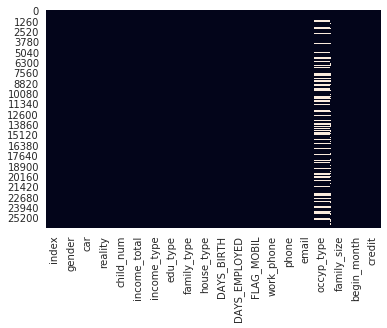

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)

In [84]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64


In [10]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / df.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
16,occyp_type,8171,0.308841


In [11]:
for col in df.columns :
    print(df[col].value_counts())

2047     1
5448     1
3371     1
13612    1
15661    1
        ..
2740     1
693      1
6838     1
4791     1
0        1
Name: index, Length: 26457, dtype: int64
F    17697
M     8760
Name: gender, dtype: int64
N    16410
Y    10047
Name: car, dtype: int64
Y    17830
N     8627
Name: reality, dtype: int64
0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64
135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
177750.0       1
91530.0        1
87448.5        1
97731.0        1
204750.0       1
Name: income_total, Length: 249, dtype: int64
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64
Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary        

In [147]:
# credit 형 변환
df = df.astype({'credit': 'object'})
df[['email', 'work_phone', 'phone','FLAG_MOBIL' ]] = df[['email', 'work_phone', 'phone','FLAG_MOBIL']].astype(object)
print(df.dtypes)

index              int32
gender            object
car               object
reality           object
child_num          int32
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int32
DAYS_EMPLOYED      int32
FLAG_MOBIL        object
work_phone        object
phone             object
email             object
occyp_type        object
family_size      float64
begin_month      float64
credit            object
dtype: object


#### object 타입을 가진 컬럼만 뽑아서 명목형 변수의 리스트 확인

In [148]:
category_feature = [ col for col in df.columns if df[col].dtypes == "object"]
category_feature

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'credit']

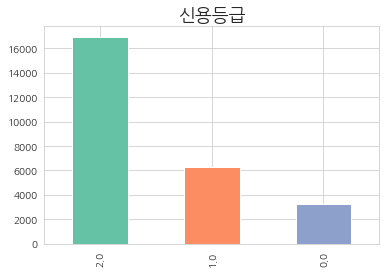

In [149]:
# 종속 변수 확인
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
df['credit'].value_counts().plot(kind='bar',color = ['#66c2a5','#fc8d62','#8da0cb']) 
plt.title('신용등급',fontproperties=fontprop)
plt.show()

In [150]:
df['DAYS_BIRTH']= abs(df['DAYS_BIRTH'])/360

In [151]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
df['DAYS_EMPLOYED']= abs(df['DAYS_EMPLOYED']) /30

In [161]:
df['begin_month']= abs(df['begin_month'])

여러번 실행X

In [152]:
def get_category(age):
    cat = ''
    if age <= 19: cat = '10대'
    elif age <= 29: cat = '20대'
    elif age <= 39: cat = '30대'
    elif age <= 49: cat = '40대'
    elif age <= 59: cat = '50대'
    elif age <= 69: cat = '60대'
    else: cat = '70대'
        
    return cat

df['age_cat'] = df['DAYS_BIRTH'].apply(lambda x: get_category(x))

In [153]:
df.drop('DAYS_BIRTH', axis = 1, inplace = True)

In [154]:
category_feature = [ col for col in df.columns if df[col].dtypes == "object"]
category_feature

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'credit',
 'age_cat']

In [155]:
numerical_feature = list(set(df.columns) - set(category_feature) - set(['index']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['DAYS_EMPLOYED', 'begin_month', 'child_num', 'family_size',
       'income_total'], dtype='<U13')

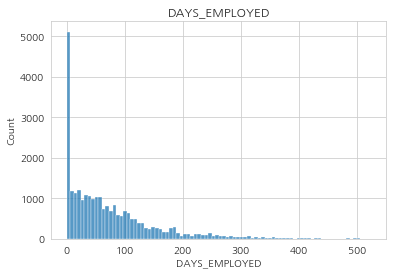

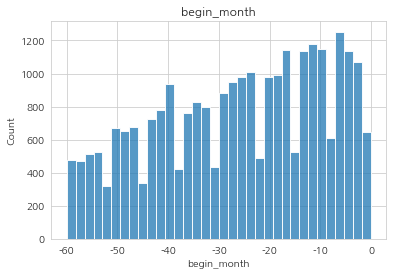

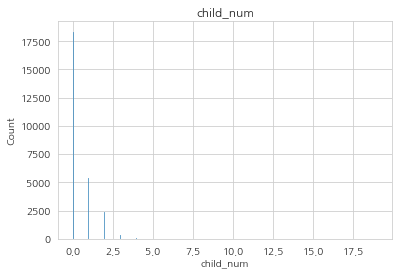

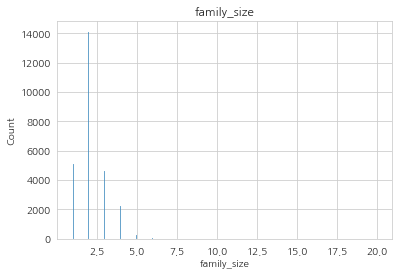

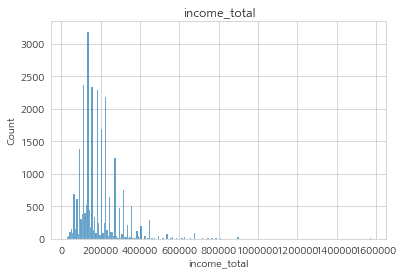

In [156]:
for col in numerical_feature:
    sns.histplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

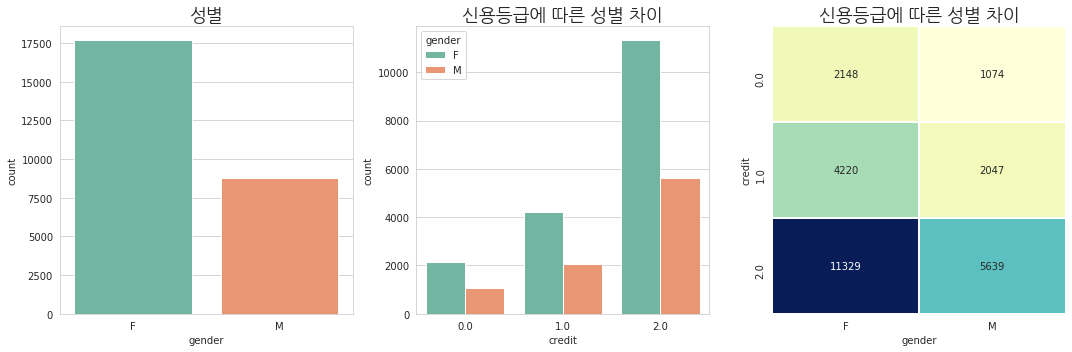

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='gender', palette='Set2', data=df, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='gender', palette='Set2', data=df, ax=ax2) 

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['gender'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False,ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('성별', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 성별 차이',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 성별 차이',fontproperties=fontprop)
plt.tight_layout()
plt.show()

### 모든 등급에서 여성이 많고, 두배 가량 차이남.

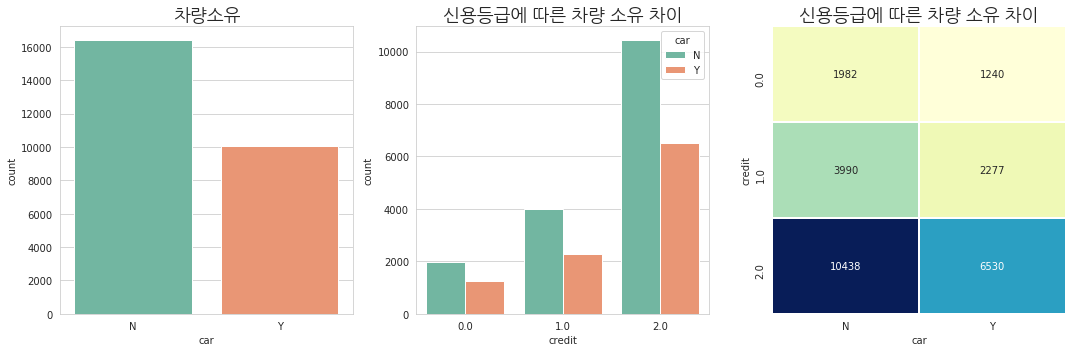

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='car', palette='Set2', data=df, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='car', palette='Set2', data=df, ax=ax2) 

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['car'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False,ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('차량소유', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 차량 소유 차이',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 차량 소유 차이',fontproperties=fontprop)
plt.tight_layout()
plt.show()

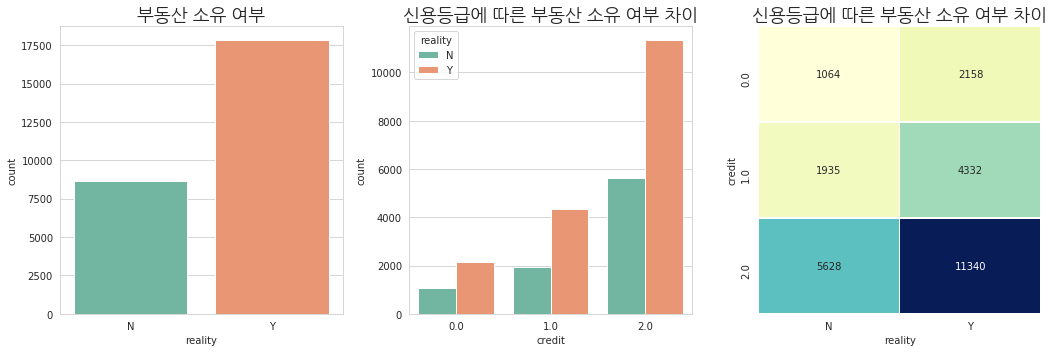

In [30]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
#subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='reality', palette='Set2', data=df, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='reality', palette='Set2', data=df, ax=ax2) 

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['reality'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False,ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('부동산 소유 여부', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 부동산 소유 여부 차이',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 부동산 소유 여부 차이',fontproperties=fontprop)
plt.tight_layout()
plt.show()

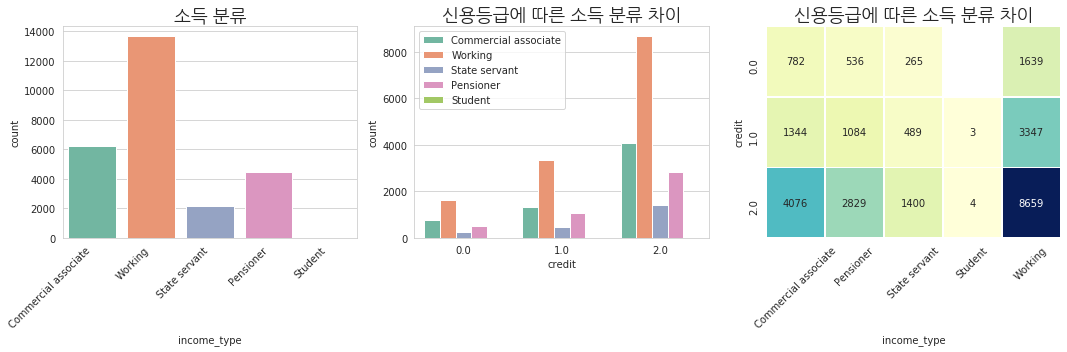

In [52]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='income_type', palette='Set2', data=df, ax=ax1)
xlabels= ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
ax1.set_xticklabels(xlabels, rotation=45, ha='right')

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='income_type', palette='Set2', data=df, ax=ax2)
ax2.legend(loc='upper left')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['income_type'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     
ax3.tick_params(axis='x', labelrotation=45)

# 차트 제목 표시
ax1.set_title('소득 분류', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 소득 분류 차이',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 소득 분류 차이',fontproperties=fontprop)
plt.tight_layout()
plt.show()

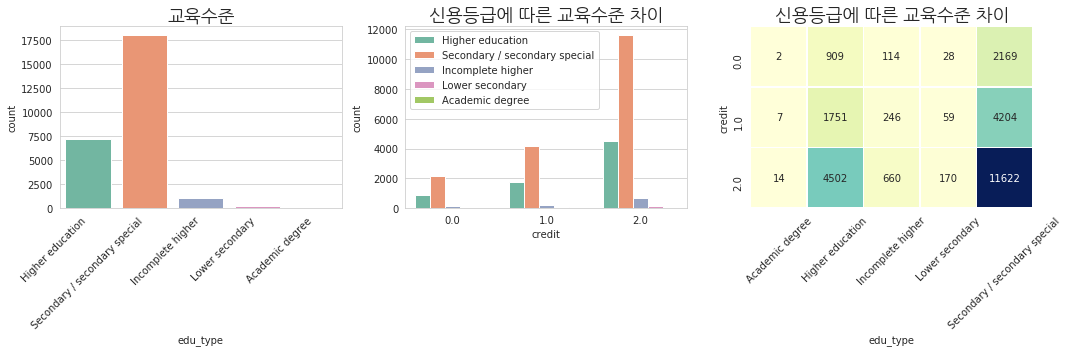

In [98]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='edu_type', palette='Set2', data=df, ax=ax1)
xlabels= ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
ax1.set_xticklabels(xlabels, rotation=45, ha='right')

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='edu_type', palette='Set2', data=df, ax=ax2)
ax2.legend(loc='upper left')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['edu_type'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     
ax3.tick_params(axis='x', labelrotation=45)

# 차트 제목 표시
ax1.set_title('교육수준', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 교육수준 차이',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 교육수준 차이',fontproperties=fontprop)
plt.tight_layout()
plt.show()

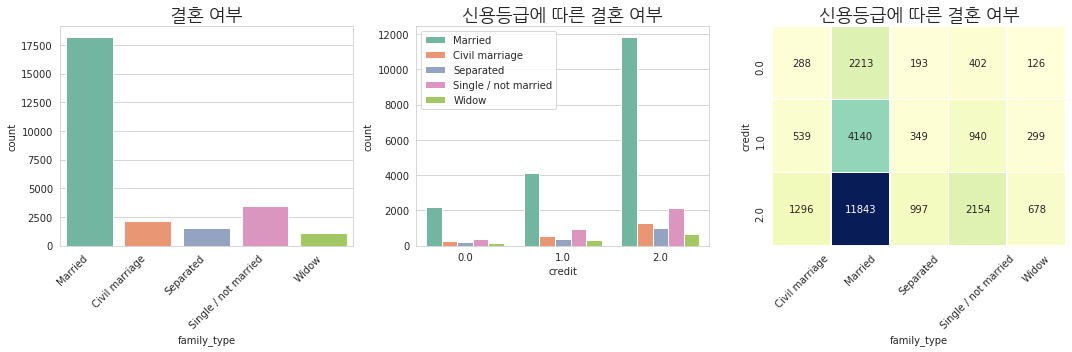

In [55]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='family_type', palette='Set2', data=df, ax=ax1)
xlabels= ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
ax1.set_xticklabels(xlabels, rotation=45, ha='right')

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='family_type', palette='Set2', data=df, ax=ax2)
ax2.legend(loc='upper left')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['family_type'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     
ax3.tick_params(axis='x', labelrotation=45)

# 차트 제목 표시
ax1.set_title('결혼 여부', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 결혼 여부',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 결혼 여부',fontproperties=fontprop)
plt.tight_layout()
plt.show()

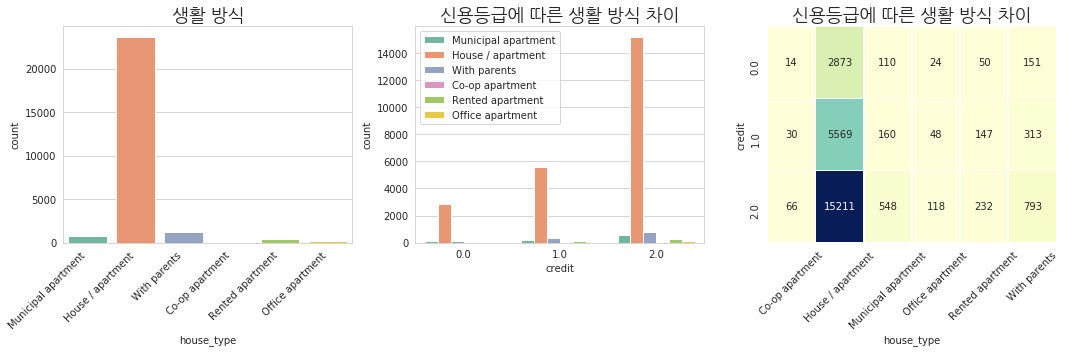

In [118]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='house_type', palette='Set2', data=df, ax=ax1)
xlabels= 	['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
ax1.set_xticklabels(xlabels, rotation=45, ha='right')

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='house_type', palette='Set2', data=df, ax=ax2)
ax2.legend(loc='upper left')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['house_type'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     
ax3.tick_params(axis='x', labelrotation=45)

# 차트 제목 표시
ax1.set_title('생활 방식', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 생활 방식 차이',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 생활 방식 차이',fontproperties=fontprop)
plt.tight_layout()
plt.show()

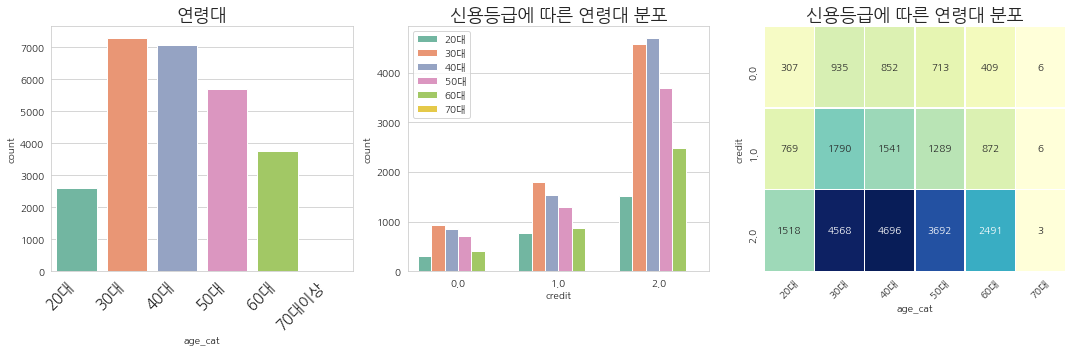

In [120]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
#sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
plt.rcParams['font.family'] = 'NanumGothic'
 # 파이썬 피클  저장
# 기본값
sns.countplot(x='age_cat', palette='Set2', data=df.sort_values('age_cat'), ax=ax1)
xlabels= ['20대', '30대', '40대', '50대', '60대', '70대이상']
ax1.set_xticklabels(xlabels, rotation=45, ha='right',fontproperties=fontprop, fontsize =15)

# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='age_cat', palette='Set2', data=df.sort_values('age_cat'), ax=ax2)
ax2.legend(loc='upper left')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['age_cat'], aggfunc='size')
plt.rcParams['font.family'] = 'NanumGothic'
# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)        # 컬러 바 표시 여부     
ax3.tick_params(axis='x', labelrotation=45)  

# 차트 제목 표시
ax1.set_title('연령대', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 연령대 분포',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 연령대 분포',fontproperties=fontprop)
plt.tight_layout()
plt.show()

In [166]:
f = open("EDA.pkl", "wb")

pickle.dump(df, f)

f.close()

In [167]:
f = open("TEST.pkl", "wb")

pickle.dump(df_test, f)

f.close()

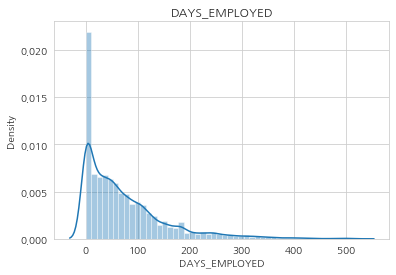

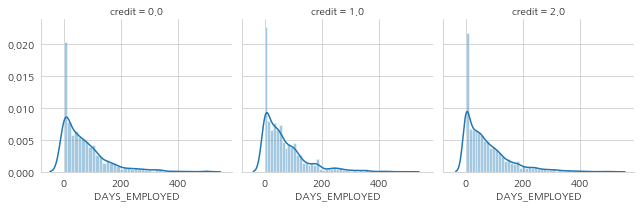

In [157]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df.loc[df['DAYS_EMPLOYED'].notnull(), 'DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED')
sns.FacetGrid(df, col = 'credit').map(sns.distplot, 'DAYS_EMPLOYED')
plt.show()

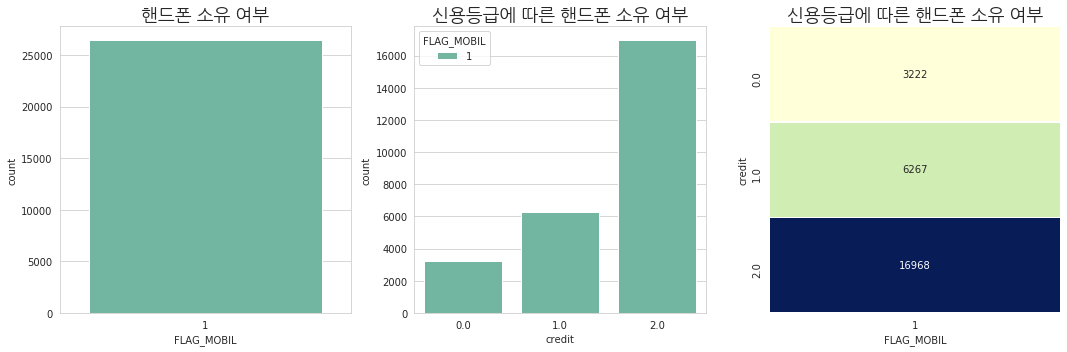

In [158]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='FLAG_MOBIL', palette='Set2', data=df, ax=ax1)


# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='FLAG_MOBIL', palette='Set2', data=df, ax=ax2)

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['FLAG_MOBIL'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('핸드폰 소유 여부', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 핸드폰 소유 여부',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 핸드폰 소유 여부',fontproperties=fontprop)
plt.tight_layout()
plt.show()

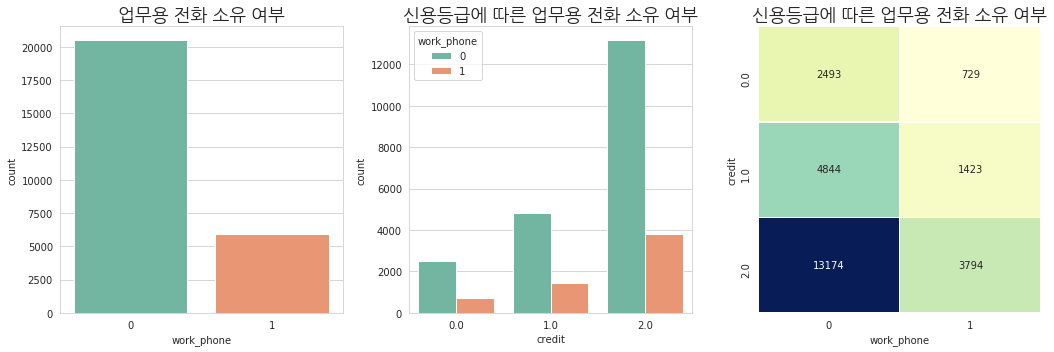

In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='work_phone', palette='Set2', data=df, ax=ax1)


# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='work_phone', palette='Set2', data=df, ax=ax2)

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['work_phone'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('업무용 전화 소유 여부', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 업무용 전화 소유 여부',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 업무용 전화 소유 여부',fontproperties=fontprop)
plt.tight_layout()
plt.show()

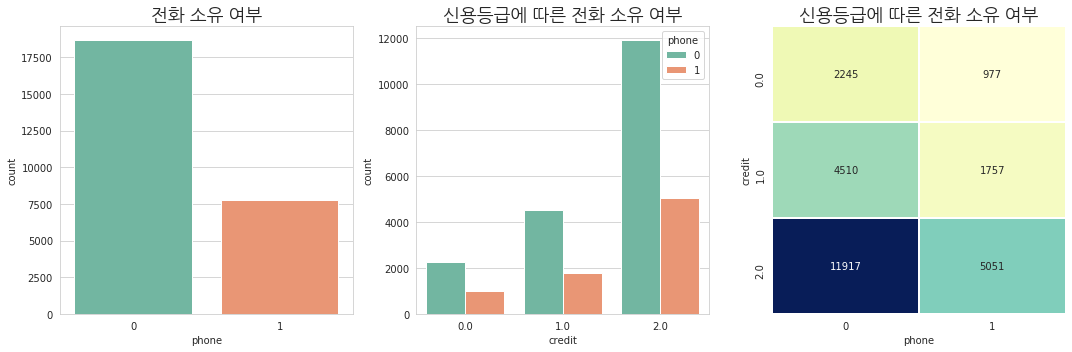

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='phone', palette='Set2', data=df, ax=ax1)


# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='phone', palette='Set2', data=df, ax=ax2)

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['phone'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('전화 소유 여부', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 전화 소유 여부',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 전화 소유 여부',fontproperties=fontprop)
plt.tight_layout()
plt.show()

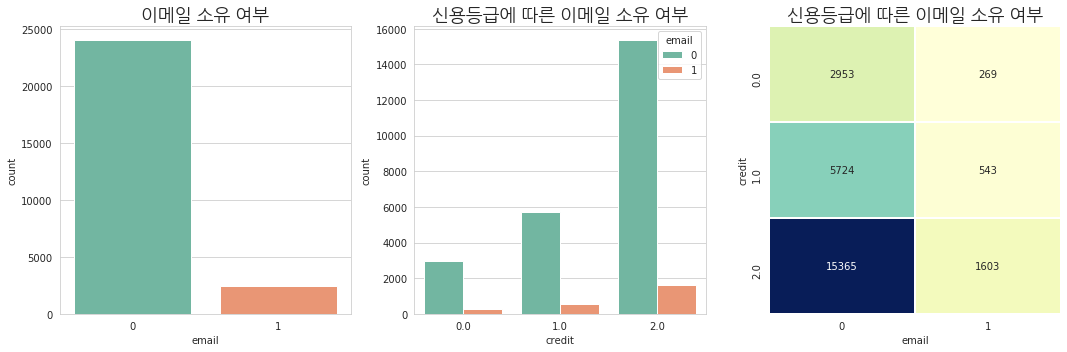

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='email', palette='Set2', data=df, ax=ax1)


# hue 옵션에 'who' 추가 
sns.countplot(x='credit', hue='email', palette='Set2', data=df, ax=ax2)

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['email'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='.0f',   # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False, ax=ax3)             # 컬러 바 표시 여부     

# 차트 제목 표시
ax1.set_title('이메일 소유 여부', fontproperties=fontprop)
ax2.set_title('신용등급에 따른 이메일 소유 여부',fontproperties=fontprop)
ax3.set_title('신용등급에 따른 이메일 소유 여부',fontproperties=fontprop)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '직업유형')

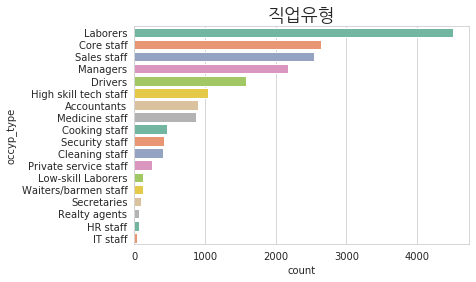

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

 
# 기본값
sns.countplot(y='occyp_type', palette='Set2', data=df, order = df['occyp_type'].value_counts().index)
plt.title('직업유형',fontproperties=fontprop)

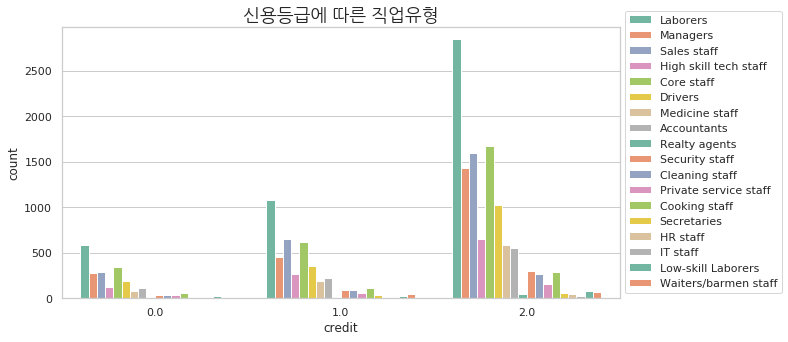

In [166]:
# hue 옵션에 'who' 추가 
fig = plt.figure(figsize=(10, 5))   
sns.countplot(x='credit', hue='occyp_type', palette='Set2', data=df) 
plt.title('신용등급에 따른 직업유형',fontproperties=fontprop)
plt.legend(loc='lower right', bbox_to_anchor=(1.3,0))

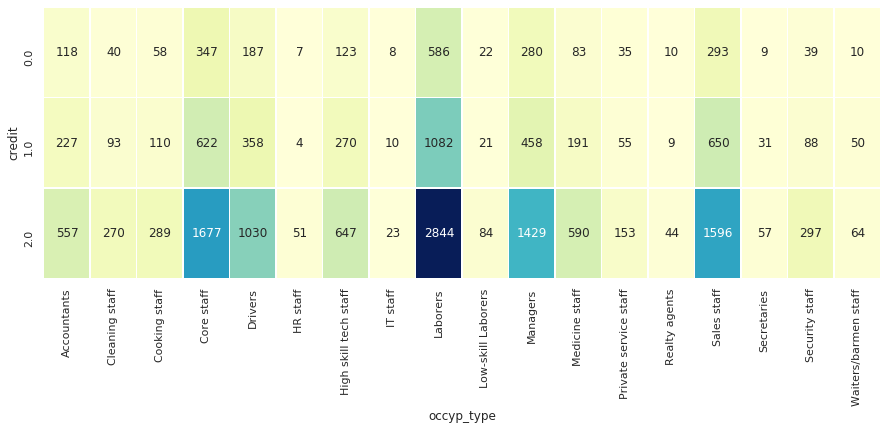

In [184]:
fig = plt.figure(figsize=(15, 5))   
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = df.pivot_table(index=['credit'], columns=['occyp_type'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부     

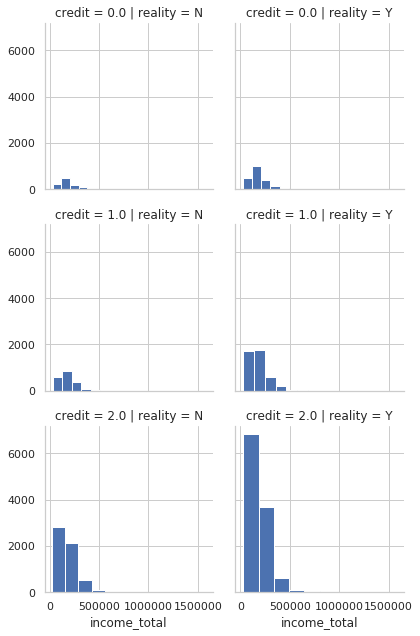

In [50]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=df, col='reality', row='credit') 

# 그래프 적용하기
g = g.map(plt.hist, 'income_total')

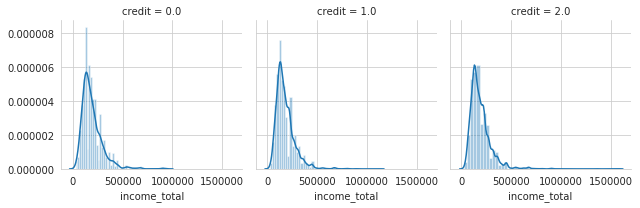

In [159]:
sns.FacetGrid(df, col = 'credit').map(sns.distplot, 'income_total')

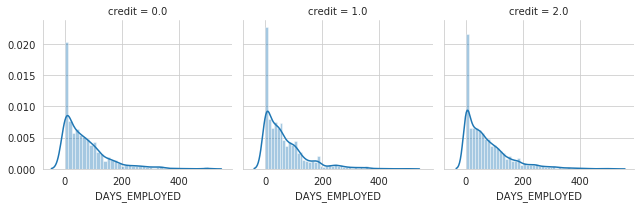

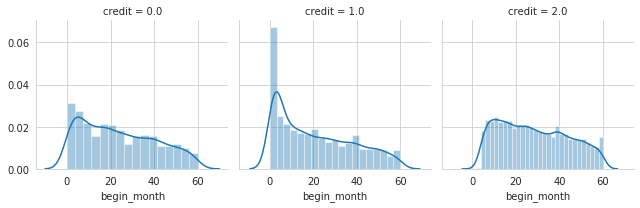

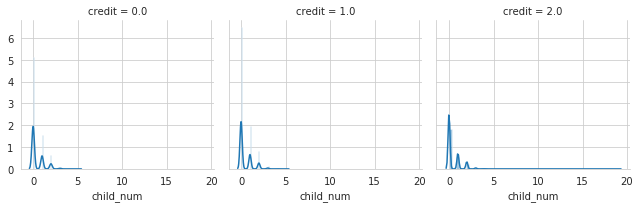

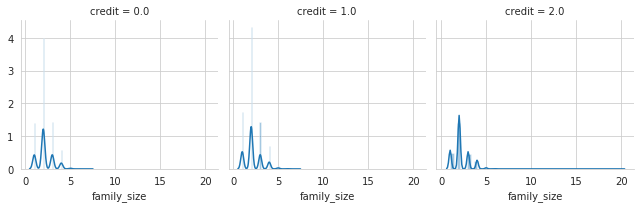

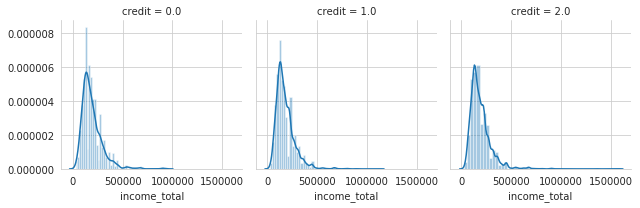

In [162]:
for col in numerical_feature:
    sns.FacetGrid(df, col = 'credit').map(sns.distplot, col)

## 전처리

In [163]:
data = pd.concat([df, df_test], axis = 0)
data['gender'] = data['gender'].replace(['F','M'], [0,  1])
data['car'] = data['car'].replace(['N', 'Y'], [0, 1])
data['reality'] = data['reality'].replace(['N', 'Y'], [0, 1])

## 결측값 대체

In [164]:
data = data.fillna({'occyp_type':'No job'})

In [ ]:
data = data.drop('index')

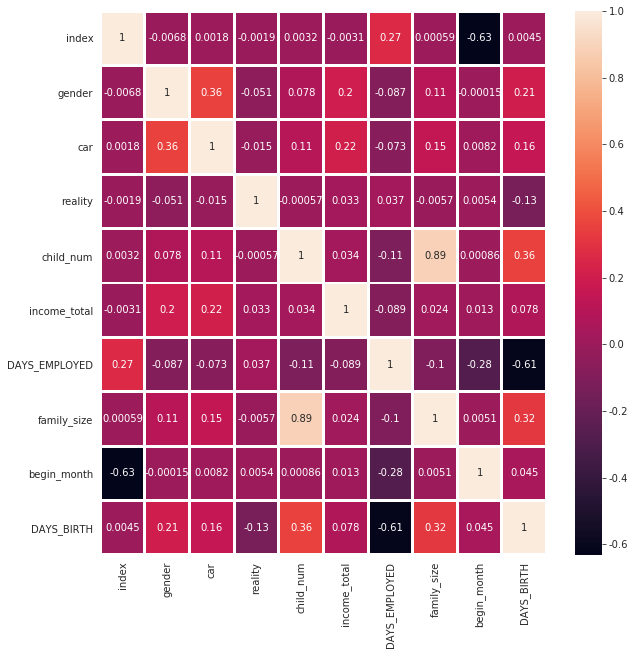

In [165]:
# 코드
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=2)